<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/plot_google_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()
#plt.style.use('fast')
#plt.rc('font', size = 14, family ='Sans-Serif')
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # ricordarsi di abilitare lo sharing pubblico dei dati
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)

#https://docs.google.com/spreadsheets/d/1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg/edit?usp=sharing
#pd =  panda_from_gspreadsheet('1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg', sheet_name='Sheet1')

def Exp(x, p0, p1): # negative exponential
  import numpy as np
  return p0*np.exp(x/p1)

def Line(x, m, q):
  import numpy as np
  return m*x + q
  
def Gain(x, p0, p1):
  import numpy as np
  return p0*x**p1

In [128]:
def sommatore_anno(pd_0):
    pd_0.fillna(0.0, inplace=True)
    esperimenti = []
    missioni = []
    richieste = []
    totali = []
    dotazioni = False
    for i, esperimento in enumerate(pd_0.Esperimento):
        if not str(esperimento) in "nan":
            # print(esperimento)
            if not dotazioni:
                esperimenti.append(esperimento)
                missioni.append(pd_0.MISS[i])
                richieste.append(pd_0.Rich[i])
                totali.append(pd_0.TOT[i])
            if dotazioni:
                if esperimento in esperimenti:
                    j = esperimenti.index(str(esperimento))
                    #print (esperimento, missioni[j], pd_0.MISS[i])
                    missioni[j] = missioni[j]+pd_0.MISS[i]
                    richieste[j] = richieste[j]+pd_0.Rich[i]
                    totali[j] = totali[j]+pd_0.TOT[i]
            if "Totale" in str(esperimento):
                dotazioni = True
                if "Esp. Dot." in str(esperimento):
                    esperimenti.append(esperimento)
                    missioni.append(pd_0.MISS[i])
                    richieste.append(pd_0.Rich[i])
                    totali.append(pd_0.TOT[i])
                if "Dotazioni" in str(esperimento):
                    esperimenti.append(esperimento)
                    missioni.append(pd_0.MISS[i])
                    richieste.append(pd_0.Rich[i])
                    totali.append(pd_0.TOT[i])
            if "Indiv." in str(esperimento):
                esperimenti.append(esperimento)
                missioni.append(pd_0.MISS[i])
                richieste.append(pd_0.Rich[i])
                totali.append(pd_0.TOT[i])

                    #print(pd_0.MISS[i], pd_0.Rich[i], pd_0.TOT[i])
    #print(len(esperimenti))
    missioni = np.array(missioni)
    richieste = np.array(richieste)
#    missioni[np.isnan(missioni)] = 0.0
#    richieste[np.isnan(richieste)] = 0.0
    return pd.DataFrame({'esperimenti':  esperimenti, 
                        'missioni': missioni, 
                        'richieste': richieste, 
                        'totali':totali})

In [132]:
# test su pd_0
pd_0 =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name='2024')
sommatore_anno(pd_0)

,esperimenti,missioni,richieste,totali
0,0,0.0,0.0,0.0
1,AMS2,185.5,662.5,540.0
2,ARCHIMEDES_2,38.0,225.0,114.5
3,AUGER,209.0,716.5,597.5
4,BULLKID_DM,10.0,100.0,78.0
5,CALC-TIER1,0.0,813.0,0.0
6,COSINUS_CSN2,13.0,163.0,89.0
7,CRESST,0.0,132.0,0.0
8,CTA,277.0,951.0,635.0
9,CUORE_CUPID,226.0,1805.0,1352.5


In [133]:
# crea il database totale
pd_anno = []
for anno in range(2016, 2025):
    pd_0 =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name=str(anno))
    pd_anno.append([anno, sommatore_anno(pd_0)])

In [ ]:
cerca = 'NEWS'
a = []
m = []
r = []
t = []
for i in range(len(pd_anno)):
    a.append(pd_anno[i][0])
    try:
        m.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].missioni.values[0])
        r.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].richieste.values[0])
        t.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].totali.values[0])
    except:
        m.append(0)
        r.append(0)
        t.append(0)
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a, r ,  label="richieste")
ax.bar(a, t ,  label="totale assegnato")
ax.bar(a, m ,  label="missioni")

plt.title(cerca)
plt.legend()
plt.show()

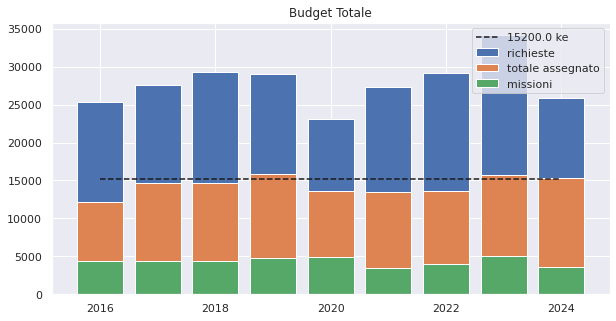

In [135]:
a = []
m = []
r = []
t = []
for i in range(len(pd_anno)):
    a.append(pd_anno[i][0])
    m.append(np.sum(pd_anno[i][1].missioni[-4:]))
    r.append(np.sum(pd_anno[i][1].richieste[-4:]))
    t.append(np.sum(pd_anno[i][1].totali[-4:]))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a, r ,  label="richieste")
ax.bar(a, t ,  label="totale assegnato")
ax.bar(a, m ,  label="missioni")
ax.hlines(y=15200.0	, xmin=pd_anno[0][0], xmax=pd_anno[i][0],
          color='k', linestyle='--', label='15200.0 ke')
plt.title("Budget Totale")
plt.legend()
plt.show()